## Imports and settings

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import pi
import numpy as np

In [2]:
pd.set_option('display.max_columns', None)

## Loading data

In [3]:
# Load the dataset 
df = pd.read_csv("../Data/cleaned_df.csv").drop("Unnamed: 0", axis=1)

# Displaying the first few rows of the dataframe to understand its structure and contents
df.head()

,Diver,Gender,Discipline,AP,RP,Card,Points,Remarks,Event Type,Day,Month,Year,Experience Dive,Experience Discipline,Country
0,Deborah Andollo (CUB),F,CWT,61,61,WHITE,61.0,OK,Worldrecord attempt,1994-06-12,6,1994,0,0,CUB
1,Umberto Pelizzari (ITA),M,CWT,72,72,WHITE,72.0,OK,Worldrecord attempt,1995-09-17,9,1995,0,0,ITA
2,Deborah Andollo (CUB),F,CWT,62,62,WHITE,62.0,OK,Worldrecord attempt,1996-10-05,10,1996,1,1,CUB
3,Michael Oliva (FRA),M,CWT,72,72,WHITE,72.0,OK,Worldrecord attempt,1996-10-11,10,1996,0,0,FRA
4,Alejandro Ravelo (CUB),M,CWT,73,73,WHITE,73.0,OK,Worldrecord attempt,1997-08-02,8,1997,0,0,CUB


In [4]:
df[["Gender", "Card"]].value_counts()

Gender  Card  
M       WHITE     12163
F       WHITE      7026
M       YELLOW     3422
        RED        1783
F       YELLOW     1568
        RED         741
Name: count, dtype: int64

## Data visualization

### Number of divings by year

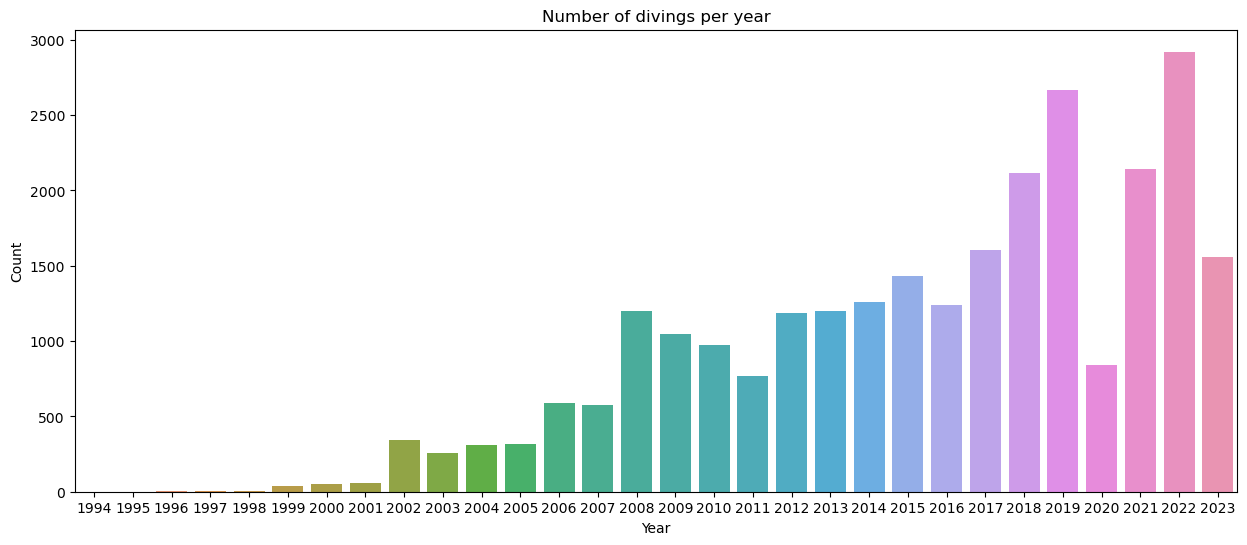

In [5]:
plt.figure(figsize=(15, 6))
sns.countplot(x='Year', data=df[['Year', 'Diver']])
plt.title('Number of divings per year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

We globally have an increasing number of divings per year, with the exception of 2020 with Covid-19, and 2023 for unknown reasons.

### Number of divers by year by gender

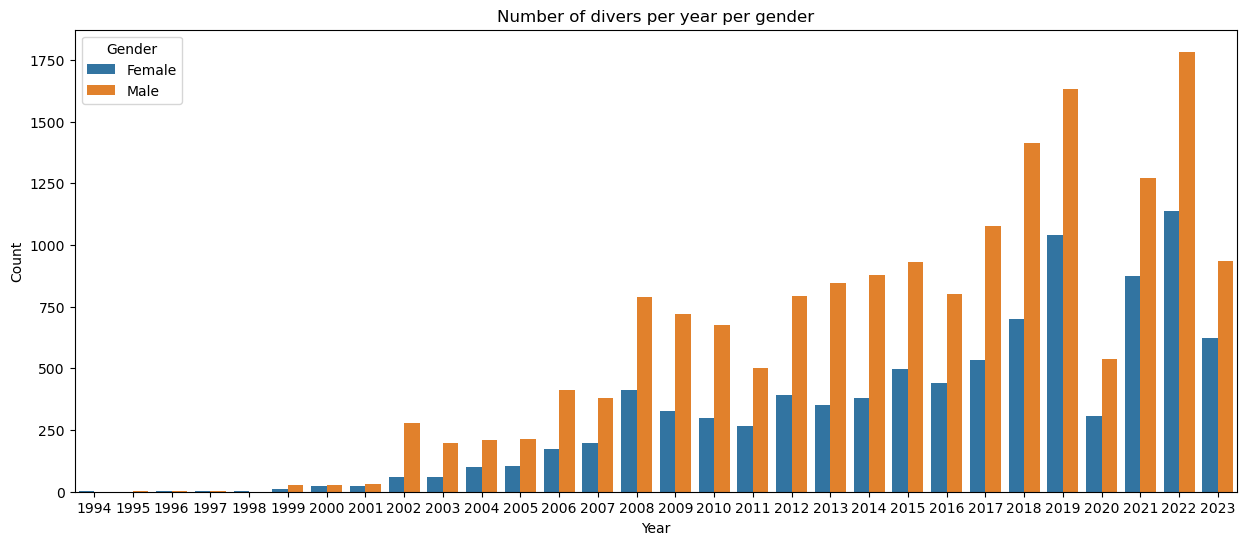

In [6]:
plt.figure(figsize=(15, 6))
sns.countplot(x='Year', hue='Gender', data=df[['Year', 'Diver', 'Gender']])
plt.title('Number of divers per year per gender')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.show()

If the number of divers per year is increasing for both gender, the number of male is still higher, even if the gap is getting smaller. 

### Cards by discipline per year

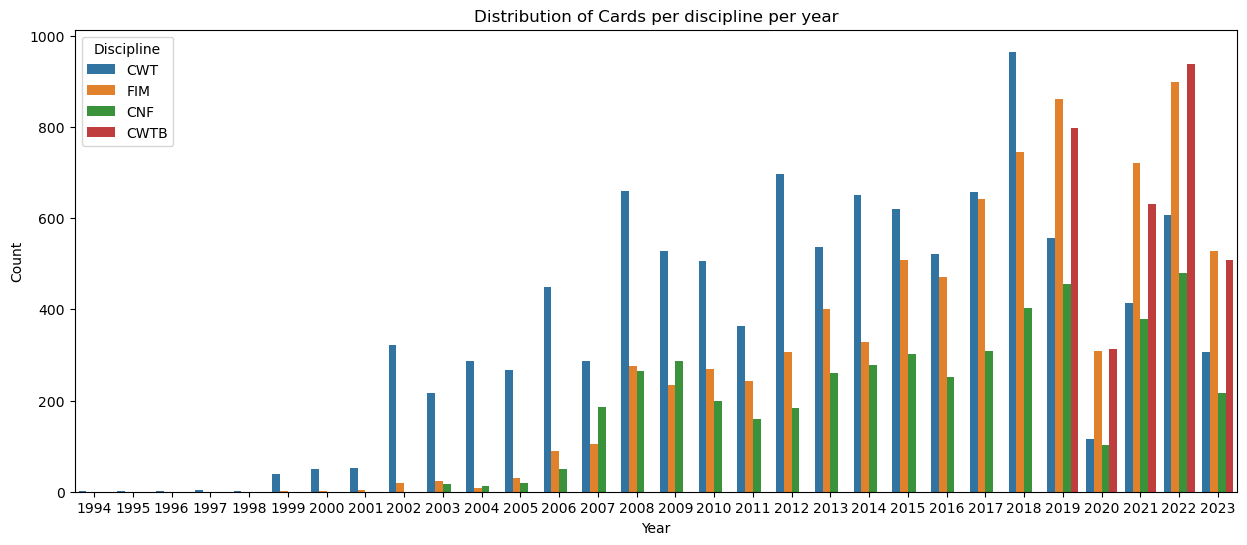

In [7]:
plt.figure(figsize=(15, 6))
sns.countplot(x='Year', hue='Discipline', data=df[['Year', "Discipline",'Card']])
plt.title('Distribution of Cards per discipline per year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Discipline', labels=list(df["Discipline"].value_counts().index))
plt.show()

With this graph, we can gather many informations.

First of all, we discover the dates where new categories appears, in our case apparently 1999 for FIM, 2003 for CNF and 2019 for CWTB.

Secondly, we observe an upward trend in terms of number of cards distributed (except 2020 obviously), which is linked to the augmentation of the number of divers previously seen.

Finally, we understand that CWTB came to make CWT obsolete, in which it kinda succeded.

### Distribution of cards by gender

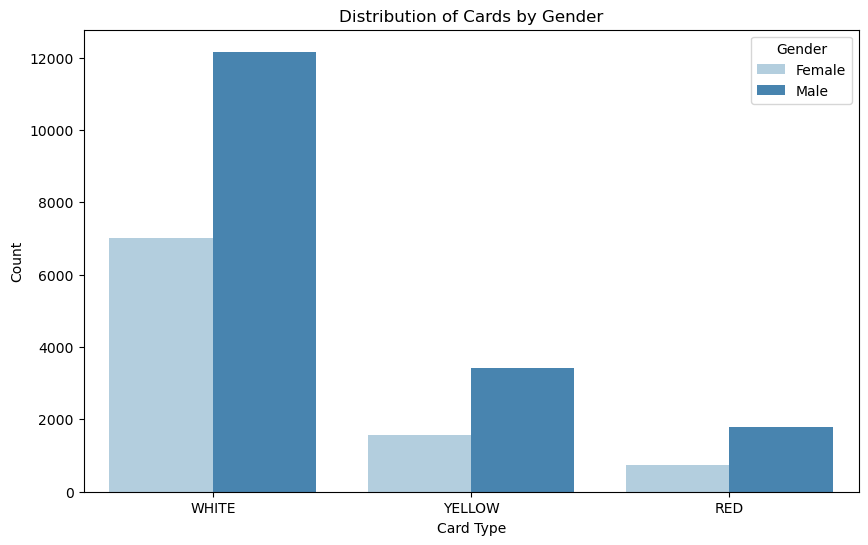

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Card', hue='Gender', data=df[['Gender', 'Card']], palette='Blues')
plt.title('Distribution of Cards by Gender')
plt.xlabel('Card Type')
plt.ylabel('Count')
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.show()

We remark that there are significantly more men than wormen.

However, the trend is the same with great difference between the number of white card and yellow or red cart.

This is reassuring, because otherwise it would have mean that only a fiew of divers would have succeded divings.

### Performances by discipline

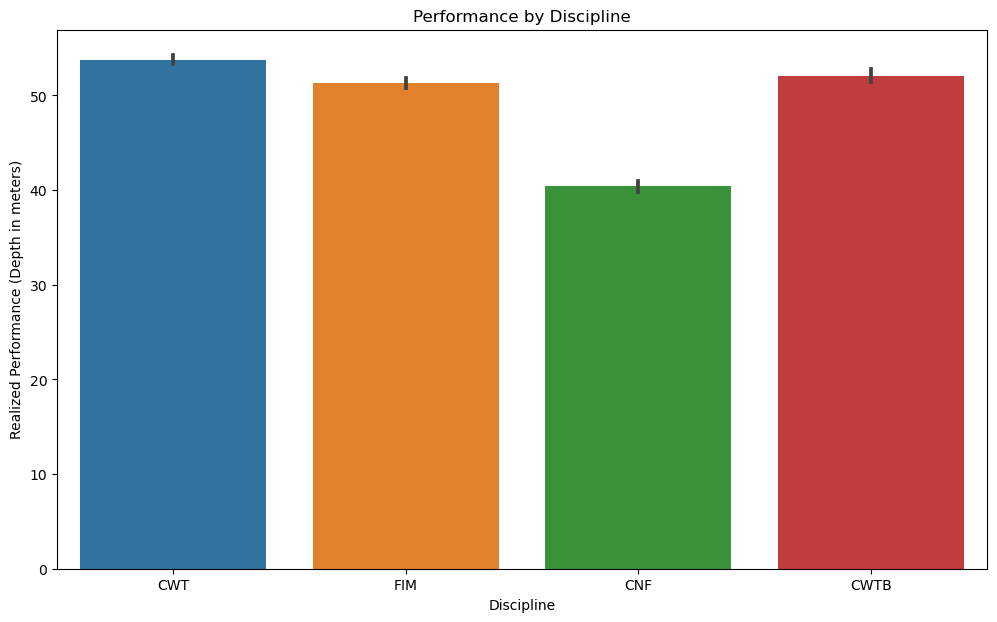

In [9]:
# Plotting performances by discipline with horizontal x-axis labels for readability
plt.figure(figsize=(12, 7))
sns.barplot(x='Discipline', y='RP', data=df[['RP', 'Discipline']])
plt.title('Performance by Discipline')
plt.xlabel('Discipline')
plt.ylabel('Realized Performance (Depth in meters)')
plt.xticks(rotation=0)  # Setting rotation to 0 for horizontal labels
plt.show()

Here we observe that divers' performance in CWT, FIM et CWTB are pretty much the same, where CNF is way lower.

### Yearly mean performance

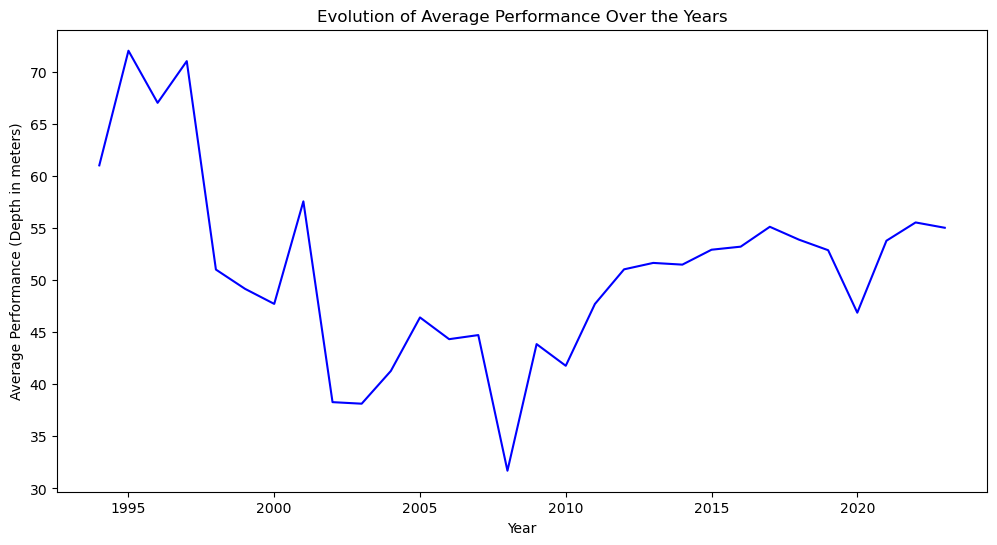

In [10]:
# Calcul of yearly mean performance
performance_by_year = df.groupby('Year')['RP'].mean().reset_index()

# Plotting the evolution of performances over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='RP', data=performance_by_year, color='blue')
plt.title('Evolution of Average Performance Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Performance (Depth in meters)')
plt.show()


This result is pretty interesting beacause it shows a huge decline in performance durings years, with only a slight increase in near 2010.

### Performance by country

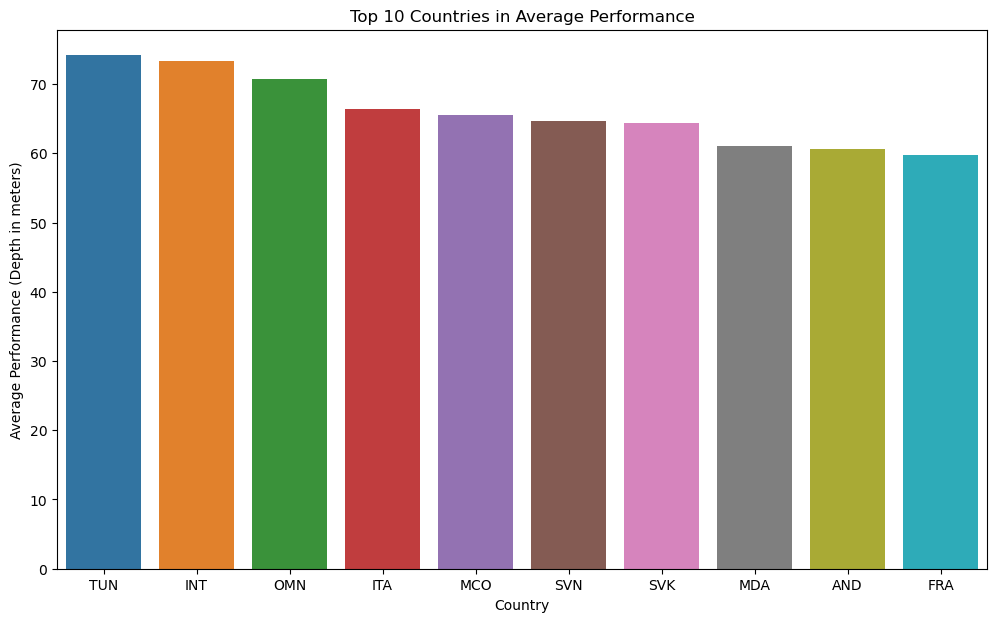

In [11]:
# Recalculating the average performance by country with updated country names
performance_by_country_full = df.groupby('Country')['RP'].mean().sort_values(ascending=False).head(10)

# Plotting performances by country with horizontal country labels
plt.figure(figsize=(12, 7))
sns.barplot(x=performance_by_country_full.index, y=performance_by_country_full.values)
plt.title('Top 10 Countries in Average Performance')
plt.xlabel('Country')
plt.ylabel('Average Performance (Depth in meters)')
plt.xticks(rotation=0)  # Setting rotation to 0 for horizontal labels
plt.show()


We can observe that there isn't such a great difference between top countries (around 10% of scope).

For precisions, "INT" means international, which apparently include Russian divers that add restrictions in participating in competitions.

### Histogram of diver experience distribution

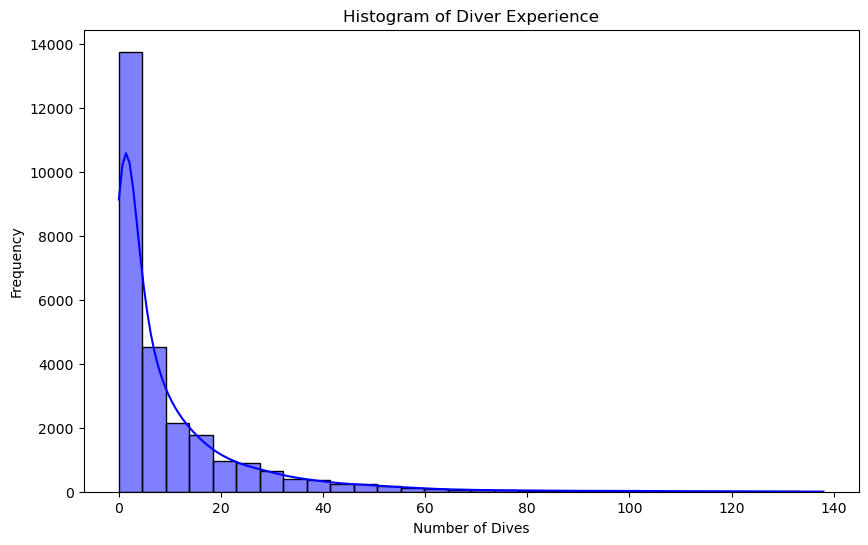

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Experience Dive'], bins=30, color='blue', kde=True)
plt.title('Histogram of Diver Experience')
plt.xlabel('Number of Dives')
plt.ylabel('Frequency')
plt.show()

As we can see, a majority of divers only did a few dives, which can be linked whera

### Radar Chart of average performance by discipline

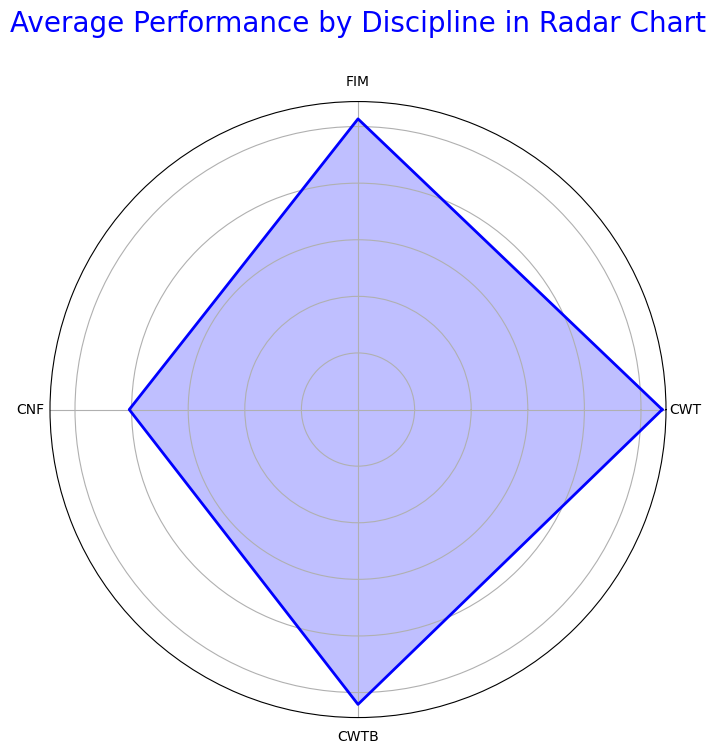

In [15]:
# Preparing data for the radar chart
disciplines = df['Discipline'].unique()
labels=np.array(disciplines)
stats = df.groupby('Discipline')['RP'].mean().reindex(disciplines)

# Number of variables
num_vars = len(labels)

# Angle calculation for each radar axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The graph is circular, so the loop must be completed
stats=np.concatenate((stats,[stats[0]]))
angles+=angles[:1]

# Plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, stats, color='blue', alpha=0.25)
ax.plot(angles, stats, color='blue', linewidth=2)
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

plt.title('Average Performance by Discipline in Radar Chart', size=20, color='blue', y=1.1)
plt.show()


### Violin Plot of performances by country (Top 5)

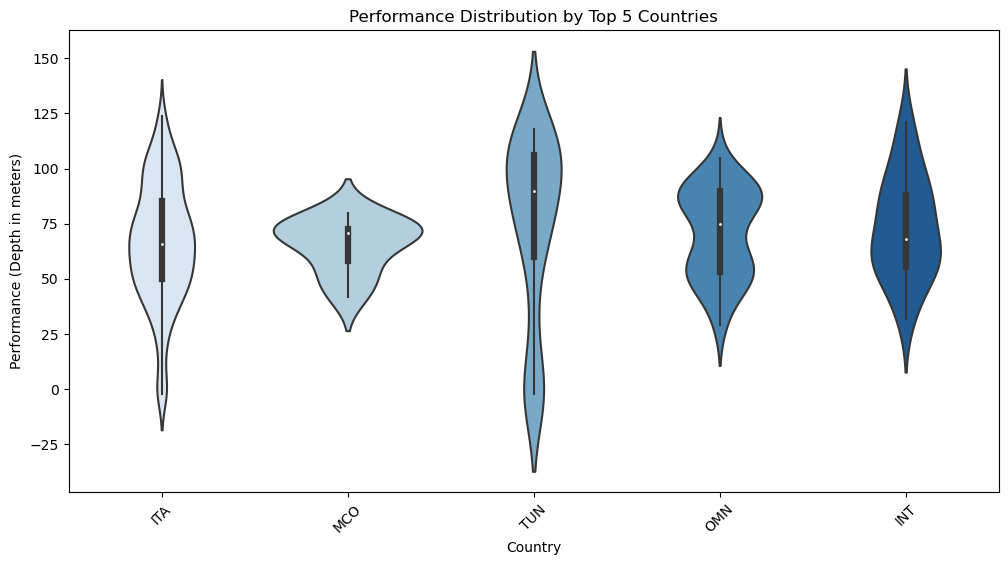

In [17]:
top_countries = performance_by_country_full.head(5).index
df_top_countries = df[df['Country'].isin(top_countries)]

plt.figure(figsize=(12, 6))
sns.violinplot(x="Country", y="RP", data=df_top_countries, palette="Blues")
plt.title('Performance Distribution by Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Performance (Depth in meters)')
plt.xticks(rotation=45)
plt.show()

### ...

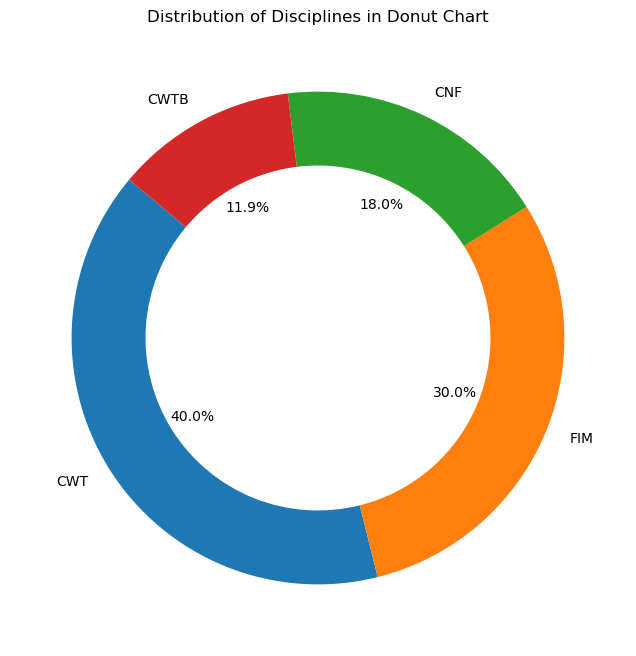

In [18]:
# Donut Chart de la répartition des disciplines
discipline_count = df['Discipline'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(discipline_count, labels=discipline_count.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
plt.title('Distribution of Disciplines in Donut Chart')
plt.show()


### ...